# Introduction
-----------------------
We have taken the original hw2.py file and transformed it into an IPython notebook (ipynb), allowing us to develop and explain the code in a more interactive and accessible format. We have ensured that the notebook retains the same functionality as the original Python file, so that the code can still be run and tested as before.

To start with, we will define the libraries required in the rest of the code:

In [24]:
import os
import matplotlib.pyplot as plt
import numpy as np
import collections
import doctest
import math


# Exercise 1
-----------------------
##### 1.1. Define compute_total_cost function

In [2]:
def compute_total_cost(solution, distances):
    """Compute the total cost of a given solution

    Examples
    --------
    >>> solution = np.array([0, 1, 2, 3, 4, 5])
    >>> distances = np.array([
    ...    [0, 5, 3, 4, 2, 3],
    ...    [5, 0, 2, 8, 3, 9],
    ...    [3, 2, 0, 2, 5, 8],
    ...    [4, 8, 2, 0, 6, 9],
    ...    [2, 3, 5, 6, 0, 1],
    ...    [3, 9, 8, 9, 1, 0],
    ... ], dtype=float)
    >>> compute_total_cost(solution, distances)
    19.0

    Parameters
    ----------
    solution : ndarray
        1D array of shape (n_cities,) with `int` dtype representing
        the solution whose length is to be computed.
    distances : ndarray
        2D array of shape (n_cities, n_cities) with `float` dtype
        representing the distance matrix.

    Returns
    -------
    length : float
    """
    # Question 1
    n_cities = solution.shape[0]
    cost = 0.0
    for i in range(n_cities):
        j = (i + 1) % n_cities
        cost += distances[solution[i], solution[j]]
    return cost

##### 1.2.Test compute_total_cost function

In [3]:
#test
solution = np.array([0, 1, 2, 3, 4, 5])
distances = np.array([[0, 5, 3, 4, 2, 3],
                      [5, 0, 2, 8, 3, 9],
                      [3, 2, 0, 2, 5, 8],
                      [4, 8, 2, 0, 6, 9],
                      [2, 3, 5, 6, 0, 1],
                      [3, 9, 8, 9, 1, 0],
                      ], dtype=float)
compute_total_cost(solution, distances)

19.0

# Exercise 2
-----------------------
##### 2.1. Define run_greedy_heuristic function

In [4]:

def run_greedy_heuristic(distances):
    """Run a greedy heuristic for TSP

    This runs a greedy heuristic for TSP and return a feasible solution.
    This starts at city 0 and creates a soltuion by finding the shortest
    cities greedily.

    Examples
    --------
    >>> distances = np.array([
    ...    [0, 5, 3, 4, 2, 3],
    ...    [5, 0, 2, 8, 3, 9],
    ...    [3, 2, 0, 2, 5, 8],
    ...    [4, 8, 2, 0, 6, 9],
    ...    [2, 3, 5, 6, 0, 1],
    ...    [3, 9, 8, 9, 1, 0],
    ... ], dtype=float)
    >>> run_greedy_heuristic(distances)
    array([0, 4, 5, 2, 1, 3])
    >>> compute_total_cost(run_greedy_heuristic(distances), distances)
    25.0

    Parameters
    ----------
    distances : ndarray
        2D array of shape (n_cities, n_cities) with `float` dtype
        representing the distance matrix.

    Returns
    -------
    solution : ndarray
        1D array of shape (n_cities,) with `int` dtype representing
        the solution obtained by the greedy heuristic.
    """

    n = distances.shape[0]

    # Start at city 0
    c = 0
    S = set(range(1, n))
    x = np.array([c], dtype=int)

    # Find the closest city to c and add it to the solution
    for i in range(n-1):
        closest_city = min(S, key=lambda j: distances[c][j])
        S.remove(closest_city)
        x = np.append(x, closest_city)
        c = closest_city

    return x

##### 2.2. Test run_greedy_heuristic function

In [5]:
distances = np.array([
    [0, 5, 3, 4, 2, 3],
    [5, 0, 2, 8, 3, 9],
    [3, 2, 0, 2, 5, 8],
    [4, 8, 2, 0, 6, 9],
    [2, 3, 5, 6, 0, 1],
    [3, 9, 8, 9, 1, 0],], dtype=float)

run_greedy_heuristic(distances)

array([0, 4, 5, 2, 1, 3])

# Exercise 3
-----------------------
##### 3.1. Define sample_two_opt function

In [6]:
def sample_two_opt(solution):
    """Return a neighbour of a given solution based on two-opt

    This returns a neighbouring solution.

    Examples
    --------
    >>> solution = np.array([0, 1, 2, 3])
    >>> sample_two_opt(solution)  # doctest: +SKIP
    array([0, 2, 1, 3])

    Parameters
    ----------
    solution : ndarray
        1D array of shape (n_cities,) with `int` dtype representing
        the current solution.

    Returns
    -------
    new_solution : ndarray
        1D array of shape (n_cities,) with `int` dtype representing
        the sampled solution.
    """

    n_cities = len(solution)
    # Select two random indices i and j, with i < j
    i = np.random.randint(n_cities-1)
    j = np.random.randint(i+1, n_cities)

    # Create a new solution by reversing the order of cities between i and j
    new_solution = np.concatenate((solution[:i], solution[i:j+1][::-1], solution[j+1:]))
    # Compute the length of the new tour
            
    return new_solution

##### 3.2. Test sample_two_opt function

In [7]:
solution = np.array([0, 1, 2, 3])
print(sample_two_opt(solution))

[0 3 2 1]


# Exercise 4
-----------------------
##### 4.1. Define run_simulated_annealing function

In [8]:
# Load the numpy array from the 'distances.npy' file
distances = np.load('distances.npy')

# Define a namedtuple called SolverResult
SolverResult = collections.namedtuple(
    "SolverResult", "objective solution objective_list"
)

# Define a function to compute the temperature for a given iteration
def temperature(current_iteration):
    return(1/(0.1*current_iteration+1))

# Define a function to run simulated annealing
def run_simulated_annealing(
    initial_solution,
    objective,
    sample,
    n_epochs,
    temperature,
):
    """
    Run simulated annealing

    Parameters
    ----------
    initial_solution : ndarray
        1D array of shape (n_cities,) with `int` dtype representing
        the initial solution.
    objective : callable
        Objective function of the following signature:
        (solution: ndarray of shape (n_cities,), distances: ndarray of shape (n_cities, n_cities)) -> float.
    sample : callable
        A function to sample a neighbouring solution.
        This should have the following signature:
        (solution: ndarray of shape (n_cities,))
        -> ndarray of shape (n_cities,).
    n_epochs : int
        Number of epochs
    temperature : callable
        A function to compute the temperature.
        This should have the following signature:
        (epoch: int) -> float.

    Returns
    -------
    best_solution : ndarray
        1D array of shape (n_cities,) with `int` dtype representing
        the best solution found.
    best_objective : float
        The objective value of the best solution found.
    objective_list : list of float
        The objective values of the iterates
    """
    
    # Initialize variables to store the best solution, its objective value and the objective values of the iterates.
    best_solution = None  
    best_objective = np.inf  
    objective_list = []  

    # Set the initial solution and its objective value as the best solution and its objective value.
    best_solution = initial_solution
    best_objective = objective(best_solution, distances)

    # Loop over the number of epochs
    for epoch in range(n_epochs):
        # Sample a neighbouring solution
        new_solution = sample(best_solution)
        # Compute the objective value of the new solution
        new_energy = objective(new_solution, distances)

        # Compute the difference in energy between the current and the new solution
        energy_difference = new_energy - best_objective

        # If the new solution has a lower objective value, accept it as the new best solution.
        # If the new solution has a higher objective value, accept it with a certain probability based on the temperature.
        if energy_difference < 0 or np.random.uniform() < np.exp(-energy_difference / temperature(epoch)):
            best_solution = new_solution
            best_objective = new_energy

        # Add the objective value of the best solution to the objective list.
        objective_list.append(best_objective)

    # Return the best solution, its objective value and the objective values of the iterates.
    return best_solution, best_objective, objective_list



##### 4.2. Set up run_simulated_annealing function within main()

In [10]:
def main():
    """Run the main routine of this script"""
    distance_matrix_file_path = "distances.npy"

    with open(distance_matrix_file_path, "rb") as f:
        distances = np.load(f)

    # Run the greedy heuristic and obtain a solution.
    initial_solution = run_greedy_heuristic(distances)

    # Test the output.
    shape = (len(distances),)

    np.testing.assert_equal(type(initial_solution), np.ndarray)
    np.testing.assert_equal(initial_solution.shape, shape)

    # Test output of `sample_two_opt` as well.

    sampled_solution = sample_two_opt(initial_solution)

    np.testing.assert_equal(type(sampled_solution), np.ndarray)
    np.testing.assert_equal(sampled_solution.shape, shape)

    # Question 4
    evolutions_matrix=[]
    number_of_iterations=20
    
    for x in range(number_of_iterations):

        results=run_simulated_annealing(
            initial_solution,
            compute_total_cost,
            sample_two_opt,
            1000,
            temperature,
        )

        best_objective_evolution=results[2]
        evolutions_matrix.append(best_objective_evolution)

    # Create a figure and axis object
    fig, ax = plt.subplots(figsize=(15, 3))

    # Plot each sublist as a line with a different color
    for sublist in evolutions_matrix:
        ax.plot(sublist,linewidth=0.3, color='turquoise')

    # Set the title and labels for the chart
    ax.set_title('Objective value evolution for 20 simulated annealing simulations')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Objective')
    ax.set_xlim(left=-10)
    # Display the chart
    plt.show()

##### 4.3. Excectue simulated annealing (main) and validation checks

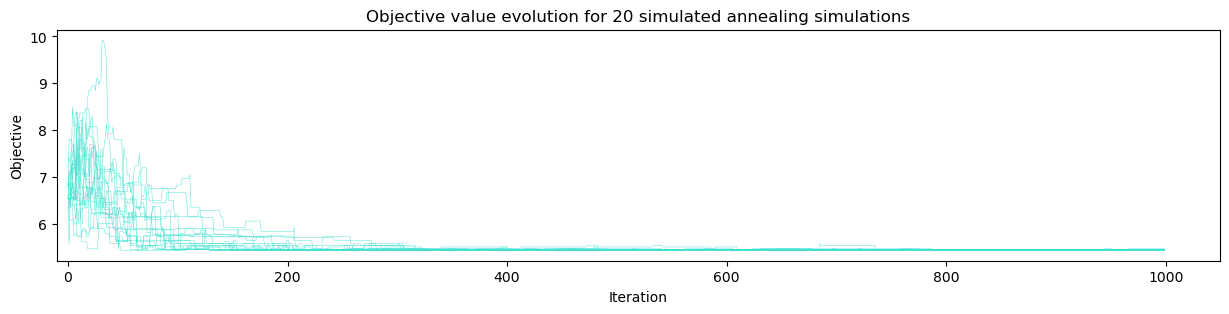

In [11]:
# Import the doctest module for running tests
import doctest

# Run all doctests in the current module
n_failures, _ = doctest.testmod(optionflags=doctest.ELLIPSIS + doctest.NORMALIZE_WHITESPACE)
# If any tests failed, raise a ValueError
if n_failures > 0:
    raise ValueError(f"Failed {n_failures} tests")

# If no tests failed, run the main function (presumably defined elsewhere)
main()

# Exercise 5
-----------------------

To determine who used each temperature presented, we must first understand how the temperature function affects the resulting output. The temperature function can be defined as follows:<br>
$
\begin{align}
temperature(k)= n/(0.1*k+1)
\end{align}
$
Where: <br>

- $k$ = current iteration <br>
- $n$ = starting temperature coeficient <br>

The rate at which the temperature decreases is slower for larger values of $n$ because the temperature starts at a higher value and decreases more gradually. This slower decrease in temperature can cause the algorithm to converge to a local minimum or become trapped on a plateau because it continues to accept worse solutions with a higher probability for a longer period.

In contrast, if the temperature is defined with a lower value, such as 0.1, the temperature will decrease more rapidly with each iteration compared to the first function. The temperature starts at a lower value and decreases more quickly because the numerator is much smaller. This rapid decrease in temperature can lead the algorithm to converge to a global minimum more quickly by reducing the probability of accepting worse solutions earlier.

We can observe these phenomena visually in the following graph:

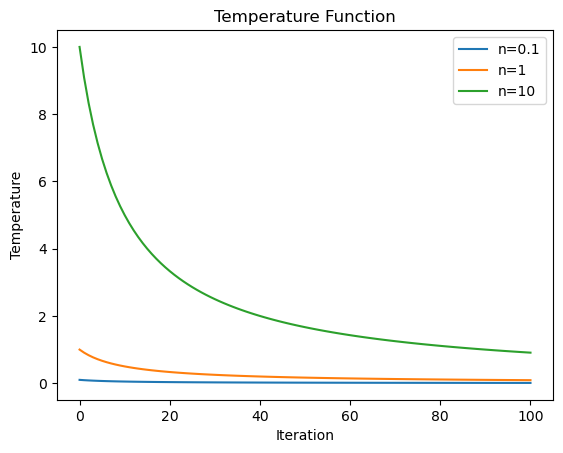

In [32]:
def plot_temperature(n_values):
    k_values = np.linspace(0, 100, 101)
    for n in n_values:
        temperature = n / (0.1 * k_values + 1)
        temperature[temperature < 0] = math.nan # Set negative values to NaN
        plt.plot(k_values, temperature, label=f"n={n}")
    plt.xlabel("Iteration")
    plt.ylabel("Temperature")
    plt.title("Temperature Function")
    plt.legend()
    plt.show()

plot_temperature([0.1, 1, 10])

Keeping this in mind, we can identify which graphs belong to each person as follows:

- $T_{1}(k)= 100/(0.1*k+1)$: This temperature function has the highest value of k, which implies that it is likely to generate the most noise and take longer to converge to a specific optimum. These characteristics are consistent with Alice's graph, which never truly settles down to a specific minimum.

- $T_{3}(k)= 0.01/(0.1*k+1)$: In contrast, this temperature function has the lowest value of k, which suggests that it should produce a stable set of results and converge to a minimum quickly. These features align with Bob's graph, which displays the least variability in the results.

- $T_{3}(k)= 1/(0.1*k+1)$: Finally, this temperature function represents an intermediate point between $T_{1}(k)$ and $T_{3}(k)$, and is expected to start with some noise but settle into a minimum with relative ease. These characteristics match Carola's result.

# Exercise 6
-----------------------

Similarly to the previous question, it will prove usefull to explore how the diferent temperatures evolve by itself through out a number of iterations, however, in this case we must acknowledge the fact that the temperature functions for Dulcinea and Emily are completely different. 
$\begin{align}
T_4(k)=10 \cdot 0.99^{k / 2} \qquad T_5(k)=\frac{10}{\log (k+1)+1}
\end{align}$

Despite its differences, we can still graph them and obtain a visaulization of the evolution of the temperature, as we can see below:

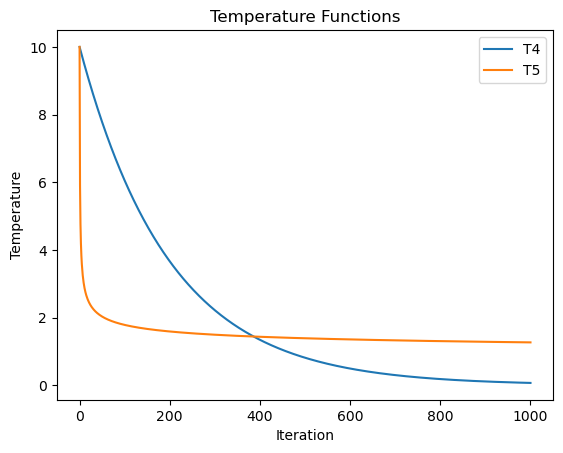

In [34]:
def T_4(k):
    return 10 * 0.99**(k/2)
def T_5(k):
    return 10 / (np.log(k+1) + 1)
k_values = np.linspace(0, 1000, 1001)
plt.plot(k_values, T_4(k_values), label="T4")
plt.plot(k_values, T_5(k_values), label="T5")
plt.xlabel("Iteration")
plt.ylabel("Temperature")
plt.title("Temperature Functions")
plt.legend()
plt.show()

WIth the previous information we can conclude that $T5$ must belong to emiliy's result, where it starts with better objective valuies but hardly improves with time, while $T4$ must belog to Dulceida, where despite starting with higher temperature and objective values, its trend to aproximate the temperature to 0, ends up providin a stabilization of the resulting values over time.